In [1]:
import MARIGOLD as mg
import matplotlib.pyplot as plt
import numpy as np
import os

%load_ext autoreload
%autoreload 2

WARNING: Covariance calculation logic still needs some work. What I mean by that is, calc_COV_RC() and calc_COV_TI() both work, but how they're being called in iate_1d_1g() is a little funny.

If you are working with a lot of different geometries and want to change when to use COV and when not to use COV, you should take a look at iate_1d_1g() and CTRL+F 'cov_method'. I'll continue working on this in the meantime to make picking COV calculation method more intuitive.

## ___INPUTS___

In [ ]:
# DATA EXTRACTION module
author = 'neup'                 # Determines which dataset you're using
refetch = True                  # Refetch data?

# DATA PROCESSING module
reconstruct_opt = True          # Void reconstruction for COV calculation. May want to implement something similar to 'passkey', if you are interested in only reconstructing for certain L/D or something
reconstruct_method = 'talley'



# IATE module
z_step = 0.01                   # Axial step size [-] nondimensional, units in L/D ***If you're inputting in [m], convert to diameters

# This part is important for running composite geometries
# The 'endpoints' variable sets IATE function queries (up to how far L/D will the function predict)
# The variable 'modes' dictates what the IATE geometry is
endpoints = [66, 110]          # IATE function endpoints
modes = [None, None]
presets = [None, None]

avg_method = 'legacy'

# Auxiliary inputs for iate_1d_1g()
aux_inputs = {
    "C_WE": 0.002,
    "C_RC": 0.004,
    "C_TI": 0.085,
    "avg_method": avg_method,
    "cov_method": 'interp',
    "reconstruct_flag": False,
    "void_method": 'interp',
    "C_inf": 1.2

    # Optional arguments
    # "optional_arg1": value1,
    # "optional_arg2": value2,
}

passkey = 'cond.theta == 90'                # Logical statement which can restrict which conditions to run (see below for example)
# passkey = ('cond.jf == 3.98 and cond.jgref == 0.25')



# Plotting module

# Most likely not going to be relevant for general use, so most of this is going to be commented out
# If you intend to compare results against previous MATLAB cases, I pasted the MATLAB results I was interested in, into an Excel sheet:
xlwb = "H:\TRSL-H\IATE\Legacy\Talley_Suite\H\standard_talley.xlsx"

perr = 0.1                      # Error bar percent error (in decimal form; 0.1 = 10%)
xl_compare = False              # When plotting, compare against Excel?
multiplot = True               # When plotting, plot with ai with contributions, void fraction, pressure? If False, will only plot ai


<>:48: SyntaxWarning: invalid escape sequence '\T'
<>:48: SyntaxWarning: invalid escape sequence '\T'
C:\Users\david\AppData\Local\Temp\ipykernel_76688\3202755338.py:48: SyntaxWarning: invalid escape sequence '\T'
  xlwb = "H:\TRSL-H\IATE\Legacy\Talley_Suite\H\standard_talley.xlsx"


## ___DATA EXTRACTION___

In [ ]:
# Extracts data from database, specified by author
# Will want to change the working directory to where you keep your spreadsheets

database = None

if author == 'ryan':
    cwd = os.path.abspath(r"H:\TRSL-H\IATE\Data\spreadsheets\25.4mm_ryan")
    dat_to_fetch = 'database_r.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='ryan_template')

elif author == 'quan':
    cwd = os.path.abspath(r"H:\TRSL-H\IATE\Data\spreadsheets\25.4mm_quan_2")
    dat_to_fetch = 'database_q.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='adix_template')

elif author == 'yadav':
    cwd = os.path.abspath(r"H:\TRSL-H\IATE\Data\spreadsheets\50.8mm")
    dat_to_fetch = 'database_y.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='yadav_template')

elif author == 'bettis':
    cwd = os.path.abspath(r"H:\TRSL-H\IATE\Data\Data_Summary_OneGroup")
    dat_to_fetch = 'database_b.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='bettis_template')
    
elif author == 'neup':
    cwd = os.path.abspath(r"H:\TRSL-H\NEUP\NEUP_Phase1")
    dat_to_fetch = 'database_n.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='neup_template')

else:
    database = mg.loadProbeData('./database.dat')

if database == None:
    database = mg.loadProbeData(dat_to_fetch)

15deg_jf2.00_jg0.10_P1_AM4-34S.xlsm
15deg_jf2.00_jg0.10_P2_AM4-34S.xlsm
15deg_jf2.00_jg0.10_P3_DM4-5S.xlsm
15deg_jf3.80_jg0.10_P1_AM4-34S.xlsm
15deg_jf3.80_jg0.10_P2_AM4-34S.xlsm
15deg_jf3.80_jg0.10_P3_DM4-4S.xlsm
15deg_jf3.80_jg0.23_P1_AM4-31S.xlsm
15deg_jf3.80_jg0.23_P2_AM4-34S.xlsm
15deg_jf3.80_jg0.23_P3_DM4-4S.xlsm
15deg_jf5.00_jg0.23_P1_AM4-31S.xlsm
15deg_jf5.00_jg0.23_P2_AM4-31S.xlsm
15deg_jf5.00_jg0.23_P3_DM4-5S.xlsm
60deg_jf2.00_jg0.10_P1_DM4-3S.xlsm
60deg_jf2.00_jg0.10_P2_DM4-3S.xlsm
60deg_jf2.00_jg0.10_P3_HM4-11S.xlsm
60deg_jf3.80_jg0.10_P1_DM4-3S.xlsm
60deg_jf3.80_jg0.10_P2_DM4-3S.xlsm
60deg_jf3.80_jg0.10_P3_DM4-3S.xlsm
60deg_jf3.80_jg0.23_P1_DM4-3S.xlsm
60deg_jf3.80_jg0.23_P2_DM4-3S.xlsm
60deg_jf3.80_jg0.23_P3_DM4-3S.xlsm
60deg_jf5.00_jg0.23_P1_DM4-3S.xlsm
60deg_jf5.00_jg0.23_P2_DM4-3S.xlsm
60deg_jf5.00_jg0.23_P3_DM4-3S.xlsm
80deg_jf2.00_jg0.10_P1_DM4-3S.xlsm
80deg_jf2.00_jg0.10_P1_HM4-1N_0722.xlsm
80deg_jf2.00_jg0.10_P2_HM4-1N_0722.xlsm
80deg_jf2.00_jg0.10_P3_HM4-1N_0721.x

## ___DATA PROCESSING___

In [4]:
# This module does a few things:
# 1. Unique flow condition finding and sorting, for plotting and other hijinks
# 2. Determine starting L/D
# 3. Void profile reconstruction for all conditions except initial condition

LoverDs = []
designations = []

for cond in database:
    cond:mg.Condition

    designations.append([cond.theta, cond.jf, cond.jgref])
    LoverDs.append(cond.LoverD)

designations = np.array(designations)
designations = np.unique(designations,axis=0)

LoverDs = np.array(LoverDs)
LoverDs = np.unique(LoverDs)



# Condition organization

condor = [[0]*len(LoverDs) for _ in range(len(designations))]

for cond in database:
    cond:mg.Condition

    run_idx = int(np.where((designations == [cond.theta, cond.jf, cond.jgref]).all(axis=1))[0])
    port_idx = int(np.where(LoverDs == cond.LoverD)[0])

    condor[run_idx][port_idx] = cond

sp = np.min(LoverDs)
print(f"\nStarting L/D: {sp}")



# Void profile reconstruction

if reconstruct_opt == True:
    for cond in database:
        print(cond)
        cond:mg.Condition

        if cond.theta == 90:
            cond.mirror(axisym = True)
        else:
            cond.mirror(sym90 = True)

        if cond.LoverD != sp:
            mg.reconstruct_void(cond,method=reconstruct_method,avg_method=avg_method)


C:\Users\david\AppData\Local\Temp\ipykernel_76688\1839891870.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  run_idx = int(np.where((designations == [cond.theta, cond.jf, cond.jgref]).all(axis=1))[0])
C:\Users\david\AppData\Local\Temp\ipykernel_76688\1839891870.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  port_idx = int(np.where(LoverDs == cond.LoverD)[0])



Starting L/D: 30
jf=2.0_jgloc=0.10_theta=15.0_port=P1_neup
jf=2.0_jgloc=0.10_theta=15.0_port=P2_neup


\\helios.ecn.purdue.edu\kang284\TRSL-H\Python_Modules\MARIGOLD\src\MARIGOLD\iate_utils.py:660: UserWarning: Minimization did not return a successful result
  warnings.warn("Minimization did not return a successful result")


ABNORMAL: 
	r/R_end: 1.8
	alpha_peak: [0.02892408]
	alpha_data_aavg: 0.052
	alpha_reconstructed_aavg: 0.052000012615001805
jf=2.0_jgloc=0.11_theta=15.0_port=P3_neup
'Invalid parameter signed_roverR selected. Not present at (90, 1.0)'
'Invalid parameter vf_naive selected. Not present at (90, 1.0)'
'Invalid parameter signed_roverR selected. Not present at (90, 1.0)'
'Invalid parameter vf_naive selected. Not present at (90, 1.0)'
'Invalid parameter signed_roverR selected. Not present at (90, 1.0)'
'Invalid parameter vf_naive selected. Not present at (90, 1.0)'
'Invalid parameter signed_roverR selected. Not present at (90, 1.0)'
'Invalid parameter vf_naive selected. Not present at (90, 1.0)'
'Invalid parameter signed_roverR selected. Not present at (90, 1.0)'
'Invalid parameter vf_naive selected. Not present at (90, 1.0)'
'Invalid parameter signed_roverR selected. Not present at (90, 1.0)'
'Invalid parameter vf_naive selected. Not present at (90, 1.0)'
'Invalid parameter signed_roverR sele

## ___IATE & PLOTTING___

WARNING:
There is an assumption in the module below that 90 degree implies axisymmetry
For vertical-downward cases, this may not be the true

jf=2.0_jgloc=0.10_theta=90.0_port=P1_neup

Basic inputs:
  cond         = jf=2.0_jgloc=0.10_theta=90.0_port=P1_neup
  query        = 66
  z_step       = 0.000254
  io           = None
  geometry     = None
  R_c          = None
  cond2        = jf=2.0_jgloc=0.11_theta=90.0_port=P2_neup

IATE coefficients:
  C_WE         = 0.002
  C_RC         = 0.004
  C_TI         = 0.085
  alpha_max    = 0.75
  C            = 3
  We_cr        = 6
  acrit_flag   = 0
  acrit        = 0.13

Method arguments:
  preset       = None
  avg_method   = 'legacy'
  cov_method   = 'interp'
  reconstruct_flag = True
  cd_method    = 'doe'
  dpdz_method  = 'LM'
  void_method  = 'driftflux'

Covariance calculation:
  COV_WE       = None
  COV_RC       = None
  COV_TI       = None

Pressure drop calculation:
  LM_C         = 25
  k_m          = 0.1
  m            = 0.316
  n            = 0.25

Void fraction calculation:
  C0           = None
  C_inf        = 1.2

Debugging:
  verbose      = False

Basic inputs:
  co

<string>:67: RuntimeWarning: invalid value encountered in sqrt



Basic inputs:
  cond         = jf=3.8_jgloc=0.11_theta=90.0_port=P2_neup
  query        = 110
  z_step       = 0.000254
  io           = {'z_mesh': array([0.762   , 0.762254, 0.762508, ..., 1.676146, 1.6764  , 1.676654],
      shape=(3602,)), 'ai': array([104.1627    , 104.16362938, 104.16468635, ..., 107.97082922,
       107.97193196, 107.97303473], shape=(3602,)), 'alpha': array([0.02880733, 0.02047767, 0.02046413, ..., 0.0218019 , 0.0218023 ,
       0.0218027 ], shape=(3602,)), 'pz': array([220259.14874796, 220255.30373681, 220251.45872566, ...,
       206420.95361744, 206417.10860629, 206413.26359514], shape=(3602,)), 'Db': array([0.00168599, 0.00117955, 0.00117876, ..., 0.00121154, 0.00121155,
       0.00121156], shape=(3602,)), 'jf': 3.8, 'jgloc': array([0.09977421, 0.09977596, 0.0997777 , ..., 0.10646295, 0.10646493,
       0.10646692], shape=(3602,)), 'jgatm': 0.21688806948979533, 'COV_WE': array([1., 1., 1., ..., 1., 1., 1.], shape=(3602,)), 'COV_RC': array([1.19222685, 1.192

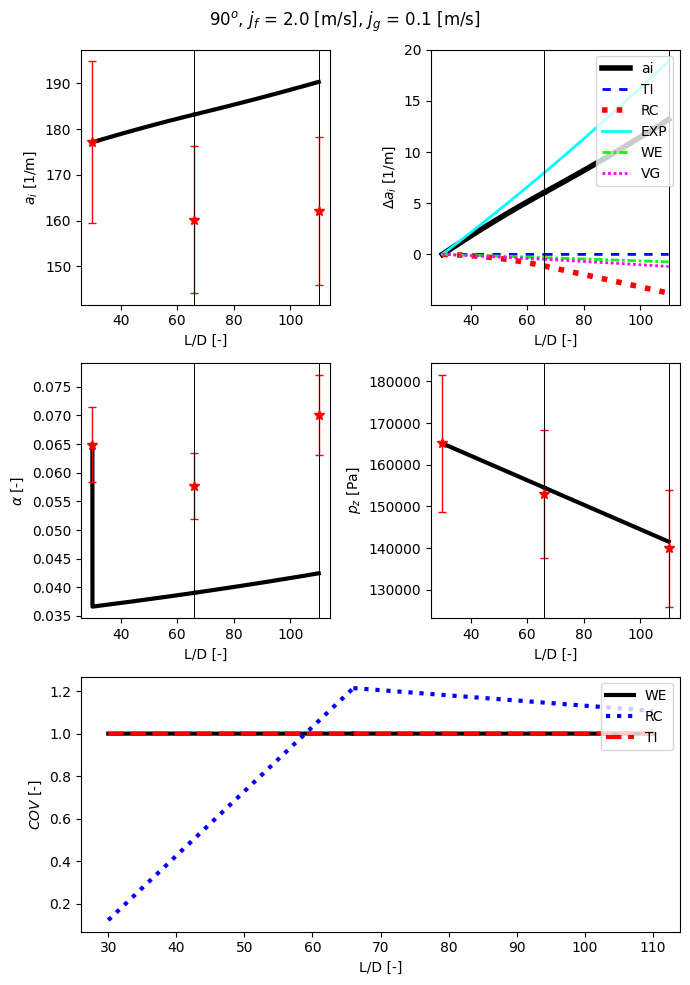

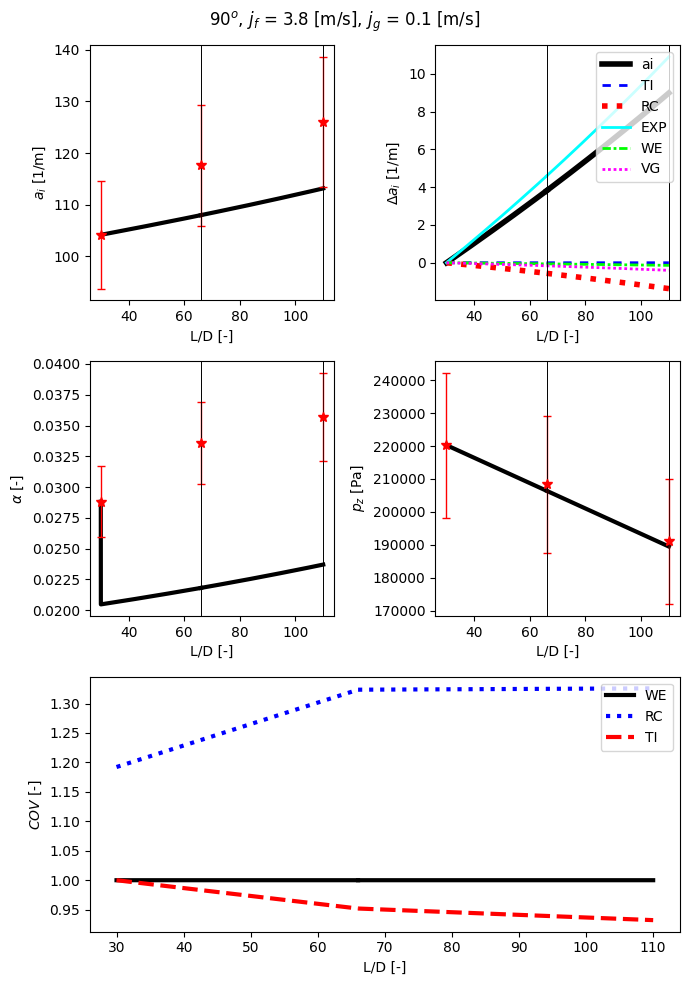

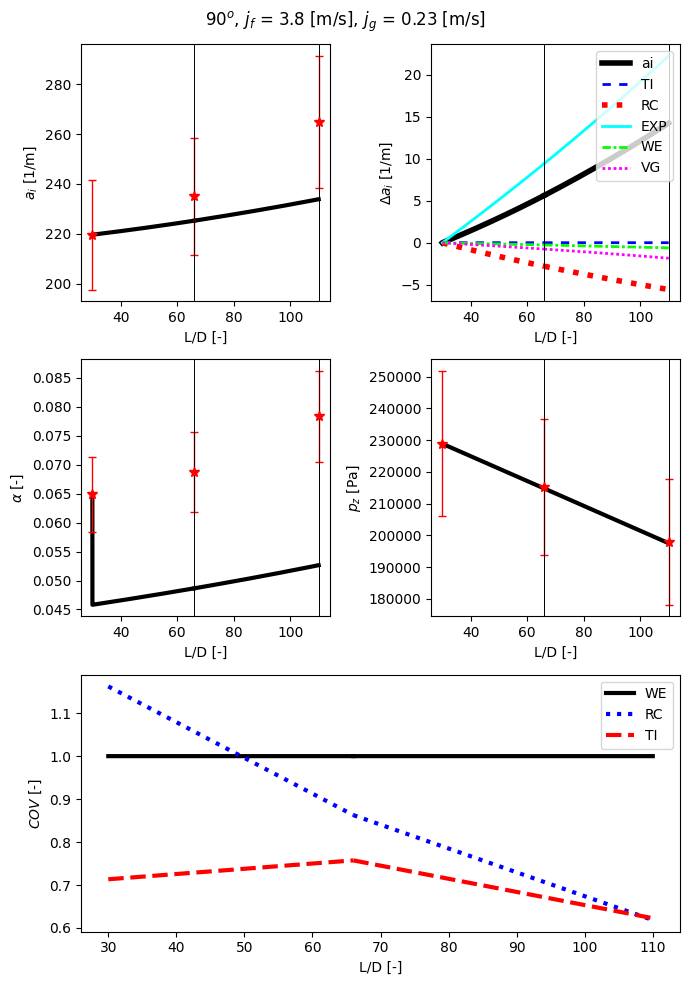

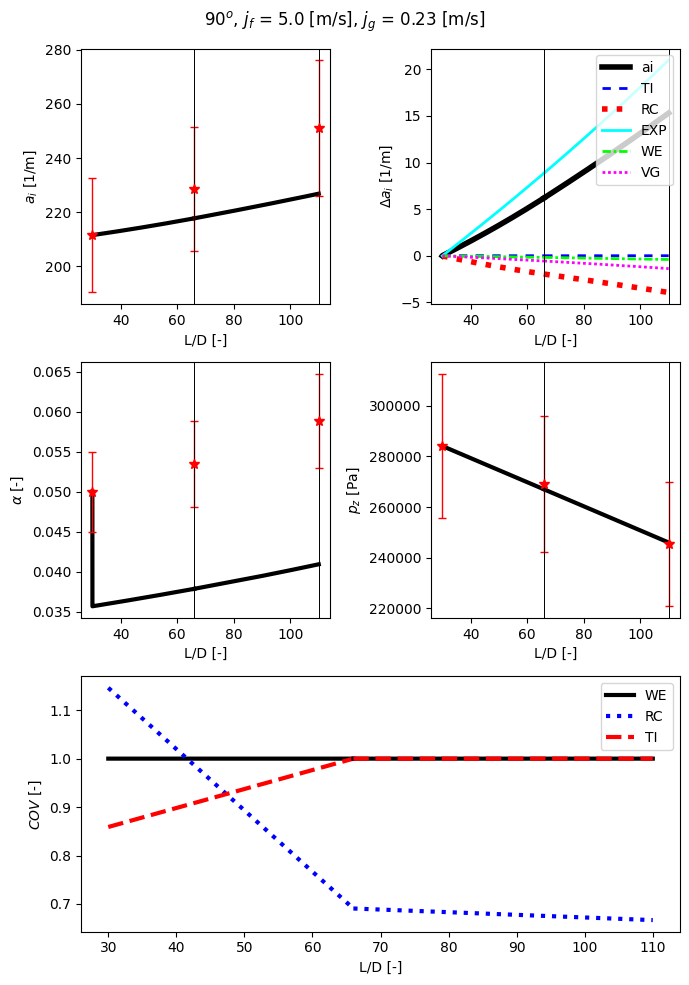

In [14]:
# This module runs the IATE itself
# Iterates through organized conditions. Input 'passkey' can be used if you want to impose any restrictions on which conditions are being run

for i, cond in enumerate([row[0] for row in condor]):
    cond:mg.Condition

    if eval(passkey):
        print(cond)
        
        # WARNING: may not be true for VD flow
        if cond.theta == 90:
            cond.mirror(axisym = True)
        else:
            cond.mirror(sym90 = True)

        # Plot preparation
        plt.figure(i,figsize=(7,10))
        plt.suptitle("${}^o$, $j_f$ = {} [m/s], $j_g$ = {} [m/s]".format(int(cond.theta),cond.jf,cond.jgref))

        ai_st = 0
        if cond.LoverD == sp:
            for ii, cp in enumerate(endpoints):

                if ii == 0:
                    # io is a dictionary which contains the outputs of the IATE function (see iate_1d_1g() for everything packed into this variable)
                    # Essentially, it is used both for the output of the IATE function, and can be re-submitted as the input to another run of iate_1d_1g()
                    # Here, if ii == 0, it is the initial condition and io is not being re-fed into iate_1d_1g()

                    # Calling iate_1d_1g() here uses bare-bones inputs
                    # If you want to specify additional things, look at iate_1d_1g() input arguments for what arguments are currently supported
                    io = mg.iate_1d_1g(
                        cond, query = cp, z_step = z_step,
                        geometry = modes[ii],
                        cond2 = condor[i][ii+1],
                        preset = presets[ii],
                        **aux_inputs
                        )
                    
                    # Used for labelling legend
                    label_ai = 'ai'
                    label_ti = 'TI'
                    label_rc = 'RC'
                    label_exp = 'EXP'
                    label_we = 'WE'
                    label_vg = 'VG'

                    label_COV_WE = 'WE'
                    label_COV_RC = 'RC'
                    label_COV_TI = 'TI'

                else:
                    # Now, io is both being assigned by iate_1d_1g(), and the previous io package is being used as an input to the function
                    io = mg.iate_1d_1g(
                        condor[i][ii], query = cp, z_step = z_step, io = io,    # <--- here, io = io means you are giving the previous run's io as the initial condition for this leg
                        geometry = modes[ii],
                        cond2 = condor[i][ii+1],
                        preset = presets[ii],
                        **aux_inputs
                        )
                    
                    # Suppress legend labels
                    label_ai = None
                    label_ti = None
                    label_rc = None
                    label_exp = None
                    label_we = None
                    label_vg = None

                    label_COV_WE = None
                    label_COV_RC = None
                    label_COV_TI = None
                
                # This is where the io package is un-packed
                # io also has packed into it Db, jf, jgloc, jgatm
                # This can be modified to export basically any variable local to the IATE function
                # Just look at the last lines of iate_1d_1g() to see what is currently supported, or to add new export variables
                z_mesh  = io["z_mesh"]      # Axial mesh
                ai      = io["ai"]          # IAC
                alpha   = io["alpha"]       # Void fraction
                pz      = io["pz"]          # Pressure

                COV_WE  = io["COV_WE"]      # Covariance of wake entrainment term
                COV_RC  = io["COV_RC"]      # Covariance of random collision term
                COV_TI  = io["COV_TI"]      # Covariance of turbulent impact term

                aiti    = io["aiti"]        # Turbulent impact (TI) contribution
                airc    = io["airc"]        # Random collision (RC) contribution
                aiexp   = io["aiexp"]       # Bubble expansion (EXP) contribution
                aiwe    = io["aiwe"]        # Wake entrainment (WE) contribution
                aivg    = io["aivg"]        # Bubble acceleration (a.k.a. velocity gradient, VG) contribution
                

                z_mesh = z_mesh / cond.Dh

                # Plotting
                if multiplot:
                    # IAC plot
                    plt.figure(i)
                    plt.subplot(321)
                    plt.plot(z_mesh,ai,'k',linewidth=3)
                    plt.ylabel('$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')

                    # IAC contributions plot, formatting to match MATLAB styles
                    plt.figure(i)
                    plt.subplot(322)
                    plt.plot(z_mesh,ai-ai[0]+ai_st,'k',linewidth=4,label=label_ai)
                    plt.plot(z_mesh,aiti,'b',linestyle=(0,(3,3)),linewidth=2,label=label_ti)
                    plt.plot(z_mesh,-airc,'r',linestyle='dotted',linewidth=4,label=label_rc)
                    plt.plot(z_mesh,aiexp,'aqua',linewidth=2,label=label_exp)
                    plt.plot(z_mesh,-aiwe,'lime',linestyle=(0,(3,1,1,1)),linewidth=2,label=label_we)
                    plt.plot(z_mesh,-aivg,'magenta',linestyle=(0,(1,1)),linewidth=2,label=label_vg)
                    plt.legend(loc='upper right')
                    plt.ylabel(r'$\Delta$$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')
                    
                    # Void fraction plot
                    plt.figure(i)
                    plt.subplot(323)
                    plt.plot(z_mesh,alpha,'k',linewidth=3)
                    plt.ylabel(r'$\alpha$ [-]')
                    plt.xlabel('L/D [-]')

                    # Pressure plot
                    plt.figure(i)
                    plt.subplot(324)
                    plt.plot(z_mesh,pz,'k',linewidth=3)
                    plt.ylabel('$p_{z}$ [Pa]')
                    plt.xlabel('L/D [-]')

                    # Covariances plot
                    plt.figure(i)
                    plt.subplot(313)
                    plt.plot(z_mesh,COV_WE,'k',linestyle='solid',linewidth=3,label=label_COV_WE)
                    plt.plot(z_mesh,COV_RC,'b',linestyle='dotted',linewidth=3,label=label_COV_RC)
                    plt.plot(z_mesh,COV_TI,'r',linestyle='dashed',linewidth=3,label=label_COV_TI)
                    plt.legend(loc='upper right')
                    plt.ylabel(r'$COV$ [-]')
                    plt.xlabel('L/D [-]')
                    
                else:
                    # IAC plot only
                    plt.figure(i)
                    plt.plot(z_mesh,ai,'k',linewidth=4)
                    plt.ylabel('$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')

                ai_st = ai_st + ai[-1] - ai[0]



# Plots data (can plot MG data or sheet area-averages, if available)
# Plots previous MATLAB runs, if available

for i, row in enumerate([row for row in condor]):
    for ii, cond in enumerate([col for col in row]):
        cond:mg.Condition
        
        if eval(passkey):

            if multiplot:
                plt.figure(i)
                plt.subplot(321)
                plt.errorbar(cond.LoverD,mg.area_avg(cond,'ai',method=avg_method),mg.area_avg(cond,'ai',method=avg_method)*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3,label='exp')

                if xl_compare == True and cond.area_avg_ai_sheet != '#REF!':
                    plt.figure(i)
                    plt.subplot(321)
                    plt.errorbar(cond.LoverD,cond.area_avg_ai_sheet,cond.area_avg_ai_sheet*perr,fmt='bx',markersize=7,elinewidth=1,capsize=3,label='exp')

                plt.figure(i)
                plt.subplot(322)

                plt.figure(i)
                plt.subplot(323)
                plt.errorbar(cond.LoverD,mg.area_avg(cond,'alpha',method=avg_method),mg.area_avg(cond,'alpha',method=avg_method)*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3)

                if xl_compare == True and cond.area_avg_void_sheet != '#REF!':
                    plt.figure(i)
                    plt.subplot(323)
                    plt.errorbar(cond.LoverD,cond.area_avg_void_sheet,cond.area_avg_void_sheet*perr,fmt='bx',markersize=7,elinewidth=1,capsize=3)

                p = (cond.jgatm * 101325 / cond.jgloc)

                plt.figure(i)
                plt.subplot(324)
                plt.errorbar(cond.LoverD,p,p*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3)
                
                for iii, cp in enumerate(endpoints):
                    plt.figure(i)

                    plt.subplot(321)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')
                    plt.subplot(322)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')
                    plt.subplot(323)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')
                    plt.subplot(324)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                plt.tight_layout()
            
            else:
                plt.figure(i)
                plt.errorbar(cond.LoverD,mg.area_avg(cond,'ai',method=avg_method),mg.area_avg(cond,'ai',method=avg_method)*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3,label='exp')

                if xl_compare == True and cond.area_avg_ai_sheet != '#REF!':
                    plt.figure(i)
                    plt.errorbar(cond.LoverD,cond.area_avg_ai_sheet,cond.area_avg_ai_sheet*perr,fmt='bx',markersize=7,elinewidth=1,capsize=3,label='exp')

                for iii, cp in enumerate(endpoints):
                    plt.figure(i)
                    plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                plt.tight_layout()


In [6]:
import ast
import inspect

class DependencyVisitor(ast.NodeVisitor):
    def __init__(self):
        self.dependencies = {}  # {var: [vars it depends on]}

    def visit_Assign(self, node):
        targets = [t.id for t in node.targets if isinstance(t, ast.Name)]
        deps = [n.id for n in ast.walk(node.value) if isinstance(n, ast.Name)]
        for t in targets:
            self.dependencies.setdefault(t, []).extend(deps)
        self.generic_visit(node)

def get_dependencies(func):
    tree = ast.parse(inspect.getsource(func))
    visitor = DependencyVisitor()
    visitor.visit(tree)
    return visitor.dependencies

def expand_dependencies(deps):
    expanded = {}
    def get_all_inputs(var, seen=None):
        if seen is None:
            seen = set()
        if var in seen:
            return set()  # avoid cycles
        seen.add(var)
        direct = set(deps.get(var, []))
        all_deps = set(direct)
        for d in direct:
            all_deps |= get_all_inputs(d, seen.copy())
        return all_deps

    for var in deps:
        expanded[var] = list(get_all_inputs(var))
    return expanded

deps = (get_dependencies(mg.iate_1d_1g))
exp_deps = expand_dependencies(deps)
print(deps)


{'preset_args': ['apply_preset', 'preset', 'cond'], 'theta': ['cond'], 'Dh': ['cond'], 'rho_f': ['cond'], 'rho_g': ['cond'], 'mu_f': ['cond'], 'mu_g': ['cond'], 'sigma': ['cond'], 'grav': ['cond'], 'p_atm': ['cond'], 'R_spec': ['cond'], 'T': ['cond'], 'LoverD': ['cond', 'Dh', 'io'], 'z_mesh': ['LoverD', 'z_step', 'np', 'query', 'z_step', 'z_mesh', 'Dh'], 'z_step': ['z_step', 'Dh'], 'R_c': ['R_c', 'Dh'], 'C_WE': ['C_WE', 'default_C_WE', 'C_WE'], 'C_RC': ['C_RC', 'default_C_RC', 'C_RC'], 'C_TI': ['C_TI', 'default_C_TI', 'C_TI'], 'COV_WE': ['np', 'z_mesh', 'Dh', 'COV_WE1', 'COV_WE2', 'cond', 'cond2', '_', 'range', 'len', 'z_mesh', 'COV_WE', '_', 'range', 'len', 'z_mesh'], 'COV_RC': ['np', 'z_mesh', 'Dh', 'COV_RC1', 'COV_RC2', 'cond', 'cond2', '_', 'range', 'len', 'z_mesh', 'COV_RC', '_', 'range', 'len', 'z_mesh'], 'COV_TI': ['np', 'z_mesh', 'Dh', 'COV_TI1', 'COV_TI2', 'cond', 'cond2', '_', 'range', 'len', 'z_mesh', 'COV_TI', '_', 'range', 'len', 'z_mesh'], 'ai': ['np', 'len', 'z_mesh'], '